# **Visual Information Processing Lab**

# LeNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Files/')
print(os.getcwd())

/content/drive/My Drive/2021/MTech/Files


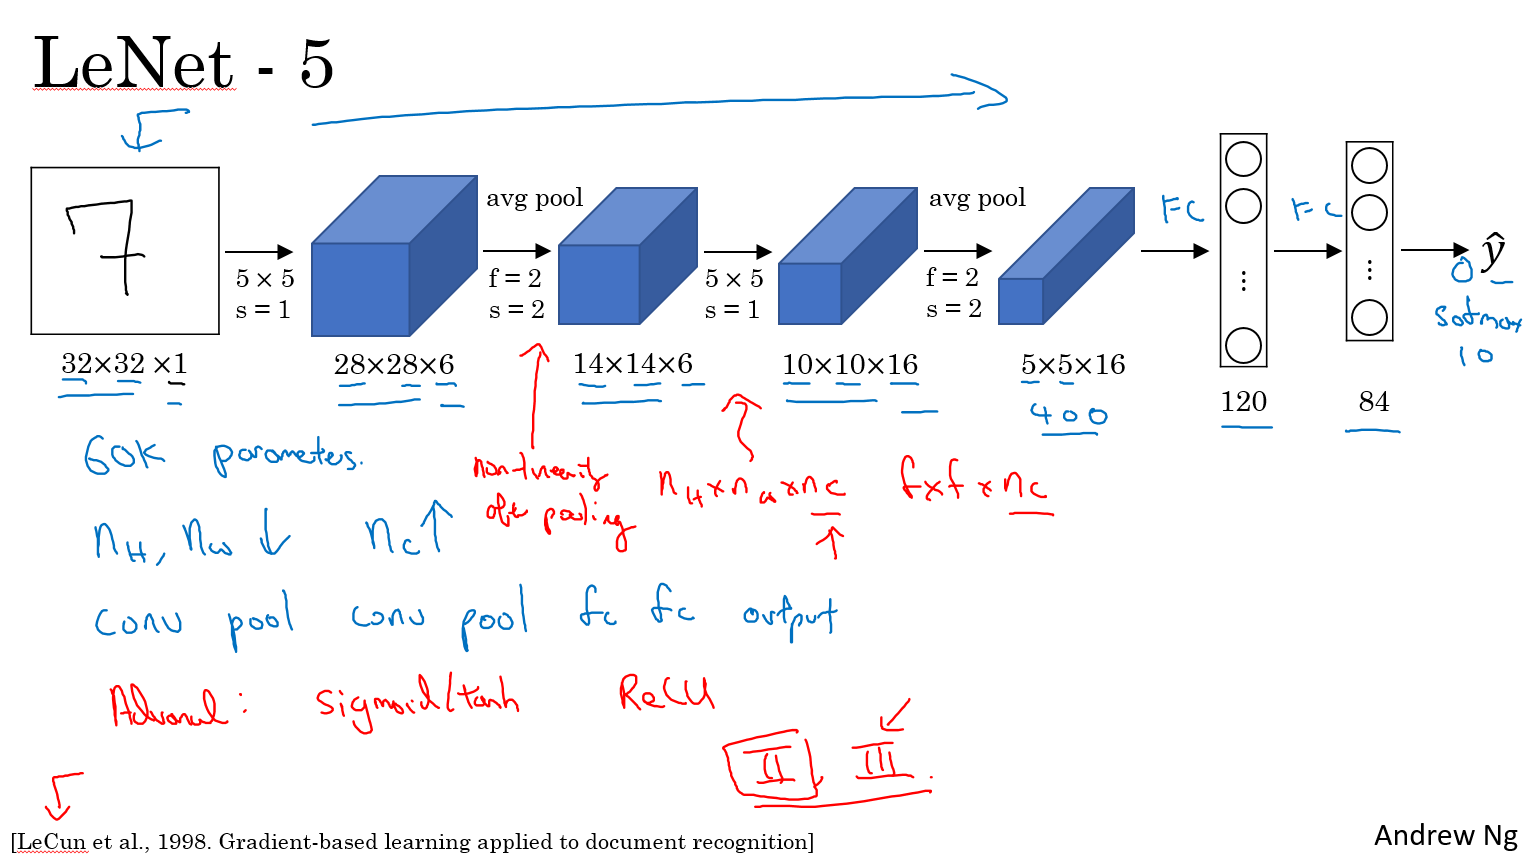

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/2021/MTech/Files/lenet.png"))

### Datasets and Pre Processing

In [ ]:
import keras
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
4
uint8
4
uint8
4
uint8


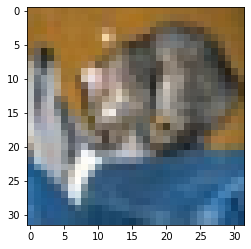

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='gray')

In [ ]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

50000
32
32


In [ ]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [ ]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
120.70748
64.150024
2.0934134 2.0934134
-1.8816435 -1.8816435


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],32,32,3)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],32,32,3)
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### LeNet Model

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Visualization of randomly initialized filters

### Compile and Training the model

In [ ]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_CIFAR10.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

cv = keras.callbacks.CSVLogger('CNN_CIFAR10.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=200, verbose=1)

Epoch 1/25
157/157 [==============================] - 34s 10ms/step - loss: 2.2861 - accuracy: 0.1288 - val_loss: 2.1487 - val_accuracy: 0.2223

Epoch 00001: val_loss improved from inf to 2.14873, saving model to CNN_CIFAR10.h5
Epoch 2/25
157/157 [==============================] - 1s 6ms/step - loss: 2.0986 - accuracy: 0.2482 - val_loss: 1.9908 - val_accuracy: 0.2871

Epoch 00002: val_loss improved from 2.14873 to 1.99077, saving model to CNN_CIFAR10.h5
Epoch 3/25
157/157 [==============================] - 1s 6ms/step - loss: 1.9425 - accuracy: 0.3057 - val_loss: 1.9097 - val_accuracy: 0.3171

Epoch 00003: val_loss improved from 1.99077 to 1.90972, saving model to CNN_CIFAR10.h5
Epoch 4/25
157/157 [==============================] - 1s 6ms/step - loss: 1.8649 - accuracy: 0.3378 - val_loss: 1.8436 - val_accuracy: 0.3399

Epoch 00004: val_loss improved from 1.90972 to 1.84362, saving model to CNN_CIFAR10.h5
Epoch 5/25
157/157 [==============================] - 1s 6ms/step - loss: 1.8035 -

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 1.4186 - accuracy: 0.4924


[1.4185981750488281, 0.49239999055862427]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,32,32,3))
print(pred)
print(pred.argmax())

[[0.01282123 0.01220543 0.14925158 0.42240676 0.02329505 0.16428903
  0.15980577 0.02990484 0.00572462 0.02029569]]
3


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4186 - accuracy: 0.4924
1.4185981750488281
0.49239999055862427


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

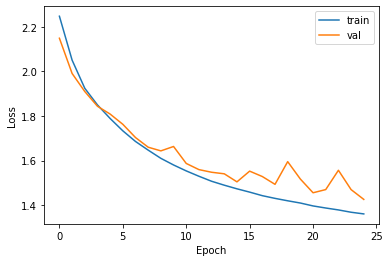

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

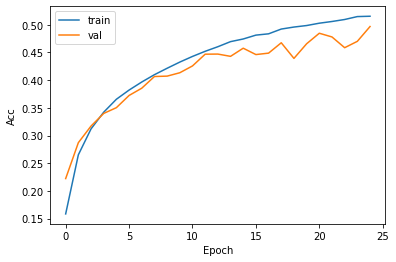

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [ ]:
%matplotlib inline
for i in range(25):
    pred = model.predict(xtest[i].reshape(1, 32,32,3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 3
2 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 1
3 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
6 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
7 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
8 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
9 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
13 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 6
14 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
15 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 2
17 Actual is  [0. 0. 0. 0. 0. 1. 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      0.59      0.57      1000
     class 1       0.46      0.73      0.57      1000
     class 2       0.39      0.39      0.39      1000
     class 3       0.38      0.31      0.34      1000
     class 4       0.49      0.33      0.39      1000
     class 5       0.45      0.44      0.45      1000
     class 6       0.59      0.56      0.57      1000
     class 7       0.60      0.52      0.56      1000
     class 8       0.64      0.50      0.56      1000
     class 9       0.43      0.55      0.48      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[591 108  62  21  14   9  14  10  96  75]
 [ 25 733   6   7   3   4   8   9  66 139]
 [107  55 389  75  91  83  80  52  19  49]
 [ 47  54  87 311  51 205  93  46  10  96]
 [ 56  68 177  56 327  63 104  93  18  38]
 [ 16  24 103 170  43 443  53  86   8  54]
 [  6  40  86  91  78  33 556  27   9  74]
 [ 36  35  47  57  51 111  21 523   9 110]
 [165 173  19  11   2  13   6  12 497 102]
 [ 37 290  15  14   5  10  12  15  48 554]]


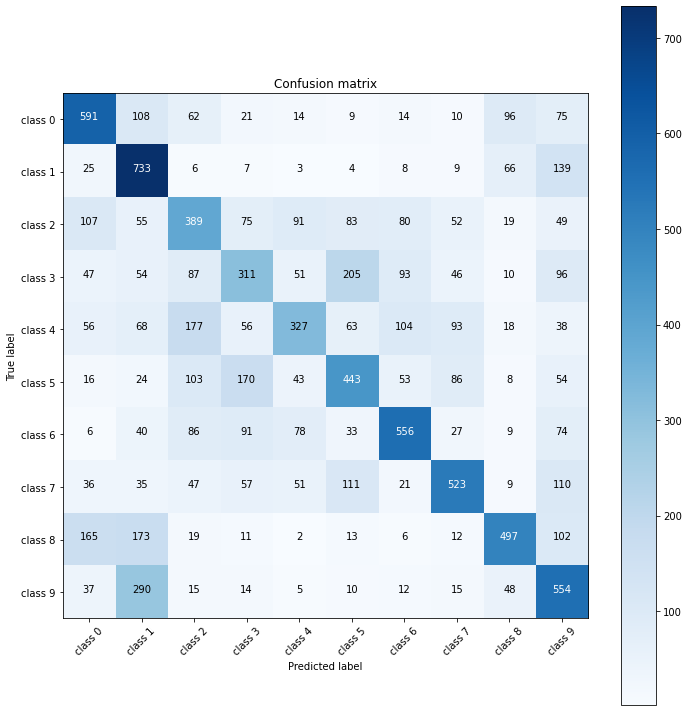

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()